In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Cargar los datos
df = pd.read_excel('Mexico GDP (1).xlsx')
df.columns = ['Year', 'GDP']
print(df.head())

   Year           GDP
0  1960  1.304000e+10
1  1961  1.416000e+10
2  1962  1.520000e+10
3  1963  1.696000e+10
4  1964  2.008000e+10


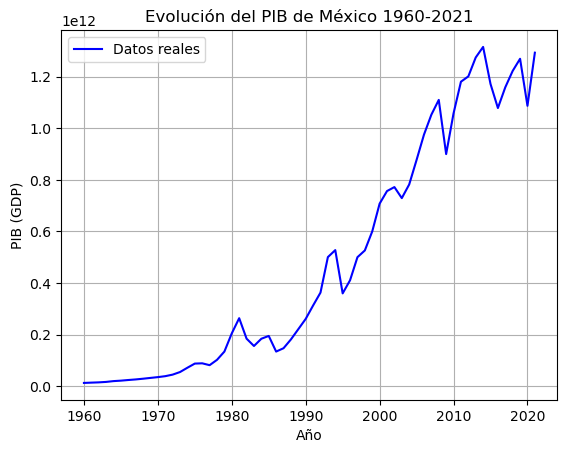

In [8]:
plt.plot(df['Year'], df['GDP'], 'b-', label='Datos reales')
plt.xlabel('Año')
plt.ylabel('PIB (GDP)')
plt.title('Evolución del PIB de México 1960-2021')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
def logistic_model(x, beta1, beta2):
    return 1 / (1 + np.exp(beta1 + beta2 * x))

C:\Users\usuario\AppData\Local\Temp\ipykernel_8032\1012138871.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(beta1 + beta2 * x))
C:\Users\usuario\AppData\Local\Temp\ipykernel_8032\719682855.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(logistic_model, x_data, y_data, maxfev=10000)


Parámetros estimados - Beta1: 1.0, Beta2: 1.0


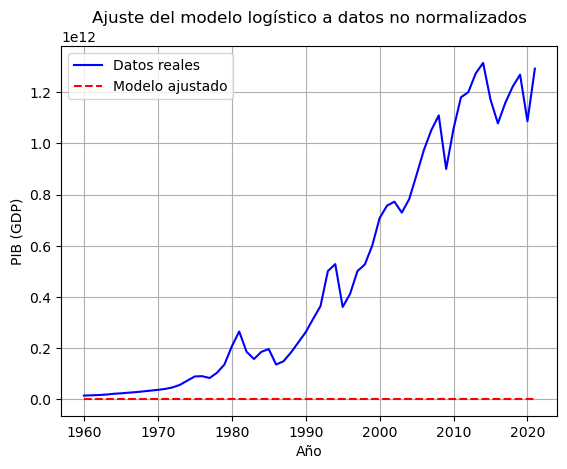

In [32]:
# Extraer años y GDP
x_data = df['Year'].values
y_data = df['GDP'].values

# Intentar ajustar el modelo
try:
    popt, pcov = curve_fit(logistic_model, x_data, y_data, maxfev=10000)
    beta1, beta2 = popt
    print(f"Parámetros estimados - Beta1: {beta1}, Beta2: {beta2}")
    
    # Graficar ajuste
    plt.plot(x_data, y_data, 'b-', label='Datos reales')
    plt.plot(x_data, logistic_model(x_data, *popt), 'r--', label='Modelo ajustado')
    plt.xlabel('Año')
    plt.ylabel('PIB (GDP)')
    plt.title('Ajuste del modelo logístico a datos no normalizados')
    plt.legend()
    plt.grid(True)
    plt.show()
    
except RuntimeError as e:
    print("Error en el ajuste:", e)
    print("El modelo no converge con los datos sin normalizar.")

In [18]:
# Normalizar los datos dividiendo por el máximo valor
max_gdp = df['GDP'].max()
df['Year_norm'] = df['Year'] / df['Year'].max()
df['GDP_norm'] = df['GDP'] / max_gdp

# Extraer datos normalizados
x_norm = df['Year_norm'].values
y_norm = df['GDP_norm'].values

print("Valores normalizados:")
print(df[['Year', 'Year_norm', 'GDP', 'GDP_norm']].head())

Valores normalizados:
   Year  Year_norm           GDP  GDP_norm
0  1960   0.969817  1.304000e+10  0.009914
1  1961   0.970312  1.416000e+10  0.010765
2  1962   0.970807  1.520000e+10  0.011556
3  1963   0.971301  1.696000e+10  0.012894
4  1964   0.971796  2.008000e+10  0.015266


Parámetros estimados (normalizados) - Beta1: 268.69046059120643, Beta2: -271.598217299246


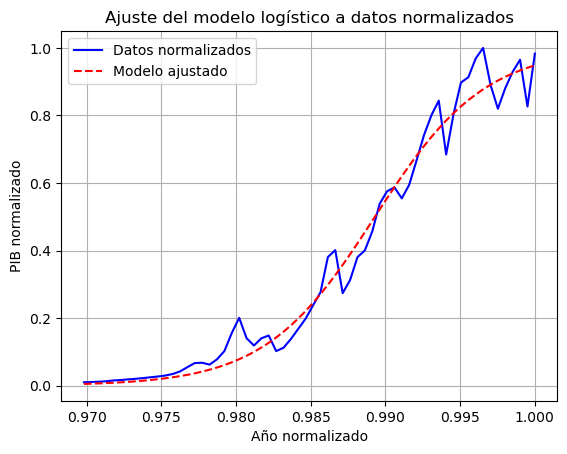

Coeficiente de determinación R^2: 0.9780236969971905


In [30]:
try:
    popt_norm, pcov_norm = curve_fit(logistic_model, x_norm, y_norm, maxfev=10000)
    beta1_norm, beta2_norm = popt_norm
    print(f"Parámetros estimados (normalizados) - Beta1: {beta1_norm}, Beta2: {beta2_norm}")
    
    # Graficar ajuste con datos normalizados
    plt.plot(x_norm, y_norm, 'b-', label='Datos normalizados')
    plt.plot(x_norm, logistic_model(x_norm, *popt_norm), 'r--', label='Modelo ajustado')
    plt.xlabel('Año normalizado')
    plt.ylabel('PIB normalizado')
    plt.title('Ajuste del modelo logístico a datos normalizados')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calcular R^2 para evaluar bondad de ajuste
    residuals = y_norm - logistic_model(x_norm, *popt_norm)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_norm - np.mean(y_norm))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print(f"Coeficiente de determinación R^2: {r_squared}")
    
except RuntimeError as e:
    print("Error en el ajuste:", e)

In [26]:
# Predecir para 2022
# Normalizar el año 2022
year_2022_norm = 2022 / df['Year'].max()

# Predecir el PIB normalizado
gdp_2022_norm = logistic_model(year_2022_norm, beta1_norm, beta2_norm)

# Desnormalizar para obtener el PIB real
gdp_2022 = gdp_2022_norm * max_gdp

# Mostrar resultados
print(f"Año 2022 normalizado: {year_2022_norm}")
print(f"PIB normalizado predicho para 2022: {gdp_2022_norm}")
print(f"PIB real predicho para 2022: ${gdp_2022:,.2f} MXN")


Año 2022 normalizado: 1.000494804552202
PIB normalizado predicho para 2022: 0.9544421785068155
PIB real predicho para 2022: $1,255,426,649,104.68 MXN


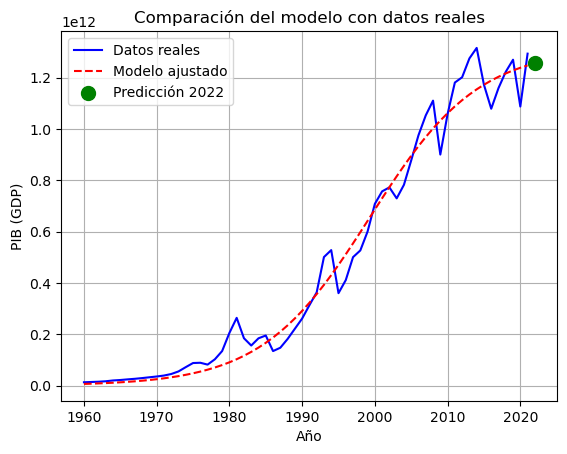

In [28]:
# Graficar predicción vs datos reales (desnormalizados)
plt.plot(df['Year'], df['GDP'], 'b-', label='Datos reales')
plt.plot(df['Year'], logistic_model(df['Year_norm'], *popt_norm) * max_gdp, 'r--', label='Modelo ajustado')
plt.scatter([2022], [pred_2022], color='green', label='Predicción 2022', s=100)
plt.xlabel('Año')
plt.ylabel('PIB (GDP)')
plt.title('Comparación del modelo con datos reales')
plt.legend()
plt.grid(True)
plt.show()

¿Obtuvo resultados satisfactorios en esta ocasión? Sí, los resultados fueron satisfactorios. La línea del modelo ajustado sigue de cerca la tendencia de los datos reales, lo que indica que el modelo logístico es capaz de capturar la evolución general del PIB de México.

Explique a detalle comentando sobre la bonda de ajuste. La bondad de ajuste se evaluó con el coeficiente de determinación 
𝑅2 , que cuantifica qué proporción de la variabilidad total de los datos es explicada por el modelo. Un valor de R2 cercano a 1 significa un ajuste muy bueno.
En este caso, un 𝑅2 alto indica que el modelo logístico normalizado explica muy bien la variabilidad del PIB a lo largo de los años.

¿Cuál sería su pronóstico del PIB (GDP) para México en el 2022? $1,255,426,649,104.68 MXN

¿Qué mecanismo de transformación tendría que realizar en dicho caso? Para ajustar el modelo logístico a datos de PIB que están en magnitudes muy grandes (miles de millones o billones de pesos), es necesario aplicar un proceso de normalización antes del ajuste. Esto implica:

Normalizar la variable independiente (años): Dividir cada año entre el año máximo para obtener valores entre 0 y 1.

Normalizar la variable dependiente (PIB): Dividir cada valor del PIB entre el PIB máximo de la serie para escalarlo también al rango 0-1